In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re


pd.options.display.max_colwidth = 100000

In [4]:
df = pd.read_csv("..reviews_popular_author.csv")
stop_words = ["much", "many", "wa"] + list(STOPWORDS)

FileNotFoundError: File b'..\reviews_popular_author.csv' does not exist

In [17]:
df = df.set_index("review_id")
df = df.drop(["Unnamed: 0"], axis=1)

In [18]:
def wc(text, title):
    wc = {}
    wl = str(text).split()
    for item in wl:
        if item and item not in stop_words:
            if item in wc:  
                wc[item] += 1  
            else:  
                wc[item] = 1
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color = "white").generate_from_frequencies(wc)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    image = "./img/" + str(title) + ".png"
    wordcloud.to_file(image)

In [19]:
bdf = pd.read_csv("..\review_content_aloe.csv")

In [20]:
bdf.columns = ['user_id', 'review_id', 'story_id', 'review_content', 'review_date', 'update_encouragement', 'targeted', 'positive', 'shallow_positive']

In [21]:
def process(term):
    return(re.sub(r"[,.?!\-]",' ', "".join(str(bdf[bdf[str(term)] == 1]['review_content'])).replace('(\\n)', ' ')).lower())

update_encouragement


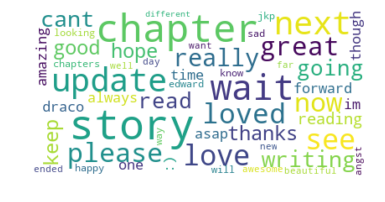

targeted


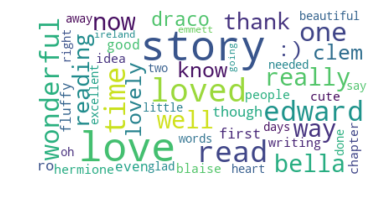

positive


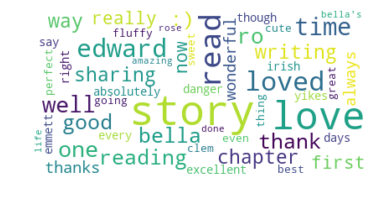

shallow_positive


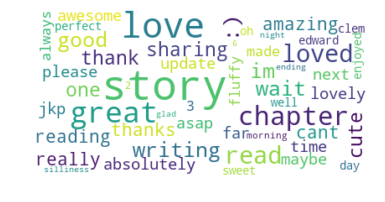

In [22]:
print('update_encouragement')
wc(process('update_encouragement'),'update_encouragement')
print('targeted')
wc(process('targeted'),'targeted')
print('positive')
wc(process('positive'),'positive')
print('shallow_positive')
wc(process('shallow_positive'),'shallow_positive')

In [23]:
def userwc(user, df):
    title = 'author' + str(user)
    wc(re.sub(r"[,.?!\-]",' ', "".join(str(df[df['user_id'] == user]['review_content'])).replace('(\\n)', ' ')).lower(), title)


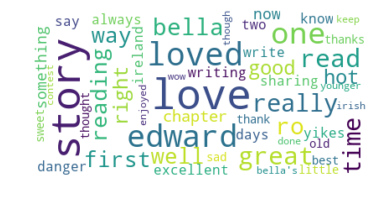

In [24]:
userwc(1091912, bdf)

In [25]:
def wc2(text, title):
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color = "white", stopwords = STOPWORDS, collocations = True).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    image = "./img/" + str(title) +  "+bigrams.png"
    wordcloud.to_file(image)

update_encouragement


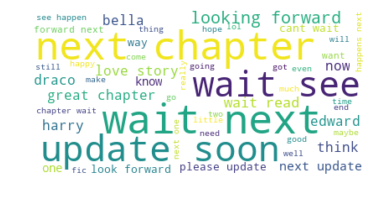

targeted


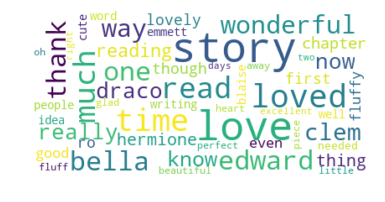

positive


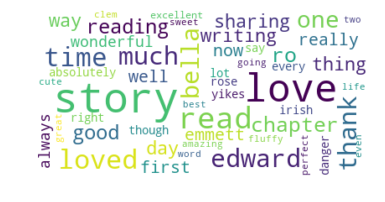

shallow_positive


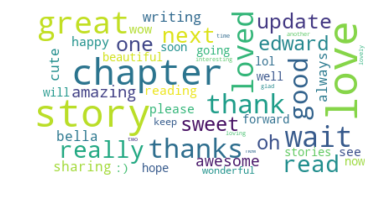

In [26]:
print('update_encouragement')
wc2(re.sub(r'[,.?!\-]',' ', "".join(bdf[bdf['update_encouragement'] == 1]['review_content']).replace('(\\n)', ' ')).lower(),'update_encouragement')
print('targeted')
wc2(re.sub(r'[,.?!\-]',' ', "".join(str(bdf[bdf['targeted'] == 1]['review_content'])).replace('(\\n)', ' ')).lower(),'targeted')
print('positive')
wc2(re.sub(r'[,.?!\-]',' ', "".join(str(bdf[bdf['positive'] == 1]['review_content'])).replace('(\\n)', ' ')).lower(),'positive')
print('shallow_positive')
wc(re.sub(r'[,.?!\-]',' ', "".join(bdf[bdf['shallow_positive'] == 1]['review_content']).replace('(\\n)', ' ')).lower(),'shallow_positive')

In [27]:
def wcdiff(text1, text2, title1, title2):
    
    wc1 = {}
    wl1 = str(text1).split()
    wc2 = {}
    wl2 = str(text2).split()
    for item in wl1:
        if item and item not in stop_words and not item.isdigit() and len(item) > 2:
            if item in wc1:  
                wc1[item] += 1  
            else:  
                wc1[item] = 1
    for item in wl2:
        if item and item not in stop_words and not item.isdigit() and len(item) > 2:
            if item in wc2:  
                wc2[item] += 1  
            else:  
                wc2[item] = 1
                
    temp1 = Counter(wc1) 
    temp2 = Counter(wc2) 
    diff1 = temp1 - temp2 
    diff2 = temp2 - temp1
    
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color = "white").generate_from_frequencies(diff1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    image = "./img/" + str(title1) + ".png"
    wordcloud.to_file(image)
    
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color = "white").generate_from_frequencies(diff2)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    image = "./img/" + str(title2) + ".png"
    wordcloud.to_file(image)

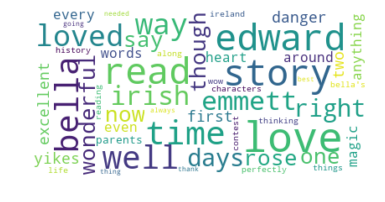

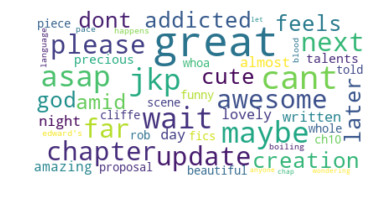

In [28]:
positive = process('positive')
shallow = process('shallow_positive')

wcdiff(positive, shallow, 'positiveVsShallow', 'shallowVsPositive')

In [29]:
from collections import Counter

def histogram(user, df, n, stop):
    word_list =  re.sub(r"[,.?!\-]",' ', "".join(str(df[df['user_id'] == user]['review_content'])).lower()).split()
    wl =[]
    for x in word_list:
        if x not in stop:
            wl.append(x)

    counts = dict(Counter(wl).most_common(n))
    
    labels, values = zip(*counts.items())

    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange your data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    indexes = np.arange(len(labels))

    bar_width = 0.35

    plt.bar(indexes, values)

    # add labels
    plt.xticks(indexes + bar_width, labels)
    plt.show()

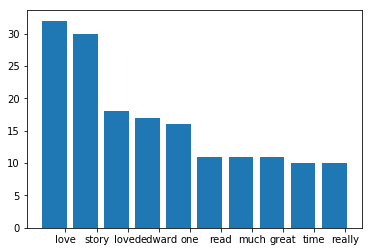

In [30]:
histogram(1091912, bdf, 10, list(STOPWORDS))

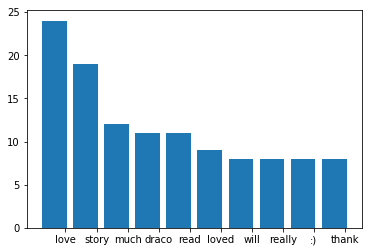

In [31]:
histogram(317330, bdf, 10, list(STOPWORDS))

In [32]:
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk

In [33]:
reviews = bdf[bdf['user_id'] == 317330].review_content.tolist()
reviews = list(map(str, reviews))

print("making word count list")
word_list = []
for item in reviews: 
    word_list.append(re.sub(r"[,.?!\-]",' ', item).split())
print(word_list[0])

print("making word count dict")
wc = {}
for wl in word_list:
    for item in wl: 
        if item and item not in stop_words and not item.isdigit():
            if item in wc:  
                wc[item] += 1  
            else:  
                wc[item] = 1



print("word2vec time")
model = Word2Vec(word_list, min_count=1)
X = model[model.wv.vocab]

print("kmeans time")
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=10)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

making word count list
['So', 'goddamned', 'cute', 'Love', 'it', 'and', 'thank', 'you', 'for', 'sharing']
making word count dict
word2vec time


C:\Users\eis65\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


kmeans time


making list of clustered words
making wordclouds


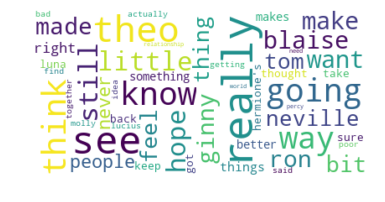

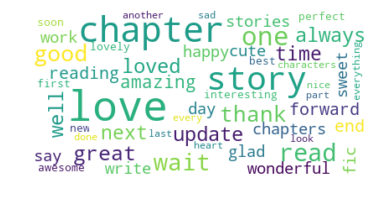

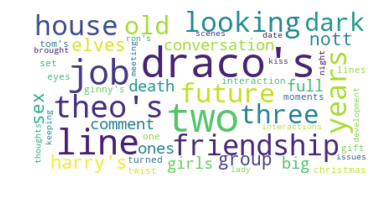

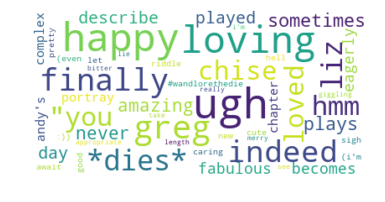

In [34]:
cluster_list = []
for value in range(4):
    cluster_list.append({})

print("making list of clustered words")
words = list(model.wv.vocab)
for i, word in enumerate(words):
    if word in wc and word.lower() not in stop_words and len(word) > 2:
        cluster_list[assigned_clusters[i]][word.lower()] = wc[word]

print("making wordclouds")
for cluster in cluster_list:
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color = "white").generate_from_frequencies(cluster)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()